Ejercicio 1

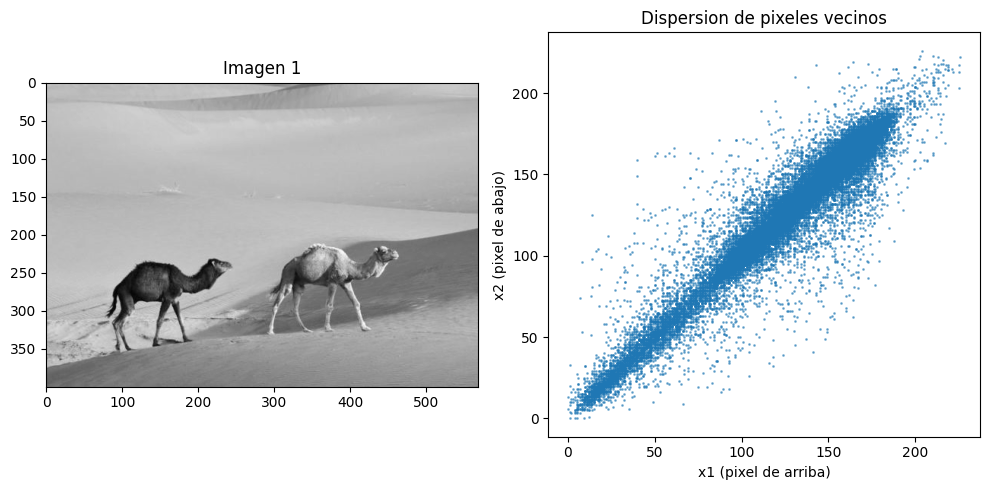

0.9791777913439222


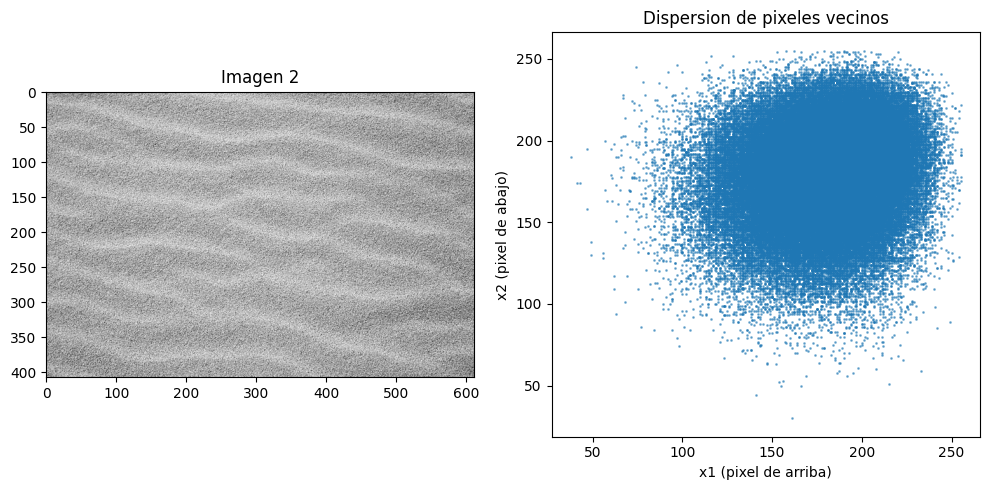

0.1451777791060309


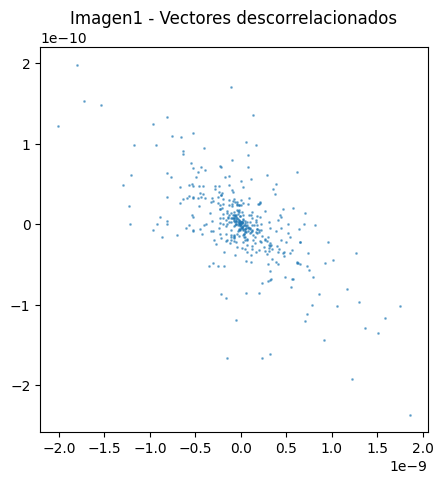

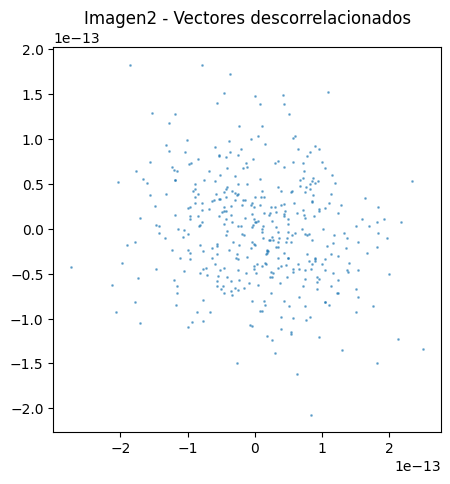

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def img_to_vec(img):
    ImgFloat = img.astype(float)
    ImgVec = ImgFloat.T.ravel()
    x1 = ImgVec[::2]
    x2 = ImgVec[1::2]
    return np.vstack([x1, x2]).T

def graficar(x, img, titulo="Imagen"):
    x1 = x[:,0]
    x2 = x[:,1]

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(img, cmap="gray")
    axes[0].set_title(titulo)

    axes[1].scatter(x1, x2, s=1, alpha=0.5)    
    axes[1].set_xlabel("x1 (pixel de arriba)")   
    axes[1].set_ylabel("x2 (pixel de abajo)") 
    axes[1].set_title("Dispersion de pixeles vecinos")
    
    plt.tight_layout()
    plt.show()

    corr = np.corrcoef(x1, x2) [0, 1]
    print(corr)

def descorrelacion(x):
    mu = x.mean(axis=0)
    x_centrado = x - mu

    cov = np.cov(x_centrado, rowvar=False)

    autoval, autovec = np.linalg.eigh(cov)

    idx = np.argsort(autoval)[::1] #indices de las posiciones ordenadas
    autovec = autovec[:, idx]

    return x_centrado @ autovec #producto entre los datos centrados y los autovectores

def graficar_descorrelacion(x, titulo="Imagen - Vectores descorrelacionados"):
    plt.figure(figsize=(5,5))
    plt.scatter(x[:,0], x[:,1], s=1, alpha=0.5)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(titulo)
    plt.show()


img1 = cv2.imread("img_01.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("img_02.jpg", cv2.IMREAD_GRAYSCALE)

v1 = img_to_vec(img1)
v2 = img_to_vec(img2)

graficar(v1, img1, "Imagen 1")
graficar(v2, img2, "Imagen 2")

d1 = descorrelacion(img1)
d2 = descorrelacion(img2)

graficar_descorrelacion(d1, "Imagen1 - Vectores descorrelacionados")
graficar_descorrelacion(d2, "Imagen2 - Vectores descorrelacionados")

Ejercicio 2

In [2]:
import numpy as np
import cv2

def Escala_de_grises(img_path):
    return cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

def Separar_en_bloques(matriz_img, tam_bloque):
    bloques=[]
    alto,ancho=matriz_img.shape
    for i in range(0,alto,tam_bloque):
        for j in range(0,ancho, tam_bloque):
            bloque = matriz_img[i:i+tam_bloque, j:j+tam_bloque]
            if bloque.shape == (tam_bloque, tam_bloque):
                bloque=bloque.reshape(-1,1,order='F')
                bloques.append(bloque)
    return np.array(bloques)

def pca_transform(X_centrado,porcentaje_de_espacio):
    _,dim_vector,_ =X_centrado.shape
    k=(porcentaje_de_espacio/100)-1
    k*=-dim_vector
    k=round(k)
    X2D = X_centrado.squeeze(-1)  
    U, S, VT = np.linalg.svd(X2D, full_matrices=False)
    U_k= U[:,:k]
    S_k=np.diag(S[:k])
    VT_k = VT[:k, :]        
    return U_k,S_k,VT_k
    
def comprimir(img_path, tam_bloque):
    Imagen_escalada=Escala_de_grises(img_path)
    X=Separar_en_bloques(Imagen_escalada,tam_bloque)
    Media_X = np.mean(X, axis=1, keepdims=True)  
    X_centrado = X - Media_X
    U_k,S_k,VT_k=pca_transform(X_centrado,80)
    Y_k = U_k @ S_k  
    
    return Y_k, Media_X, VT_k

Ejercicio 3

In [ ]:
def descomprimir(matriz_Y_k, Media_X, VT_k):
    Xreconstruida = (np.array(matriz_Y_k) @ np.array(VT_k))[:, :, None] + np.array(Media_X)
    n = Xreconstruida.shape[0]
    X_recon = np.zeros((n, 8, 8))
    for i in range(n):
        X_recon[i] = Xreconstruida[i].reshape(8, 8, order='F')
    
    return X_recon
    
path=r"img_03.jpg"


y,mu,vt=comprimir(path,8)
X_reconstruida = descomprimir(y, mu, vt)

Imagen_escalada = Escala_de_grises(path)
if Imagen_escalada != None:
    alto, ancho = Imagen_escalada.shape

def recomponer_imagen(bloques, alto, ancho, tam_bloque=8):

    alto_ajustado = (alto // tam_bloque) * tam_bloque
    ancho_ajustado = (ancho // tam_bloque) * tam_bloque
    
    imagen = np.zeros((alto_ajustado, ancho_ajustado))
    bloques_por_fila = ancho_ajustado // tam_bloque
    
    for idx, bloque in enumerate(bloques):
        if idx < len(bloques):
            fila = (idx // bloques_por_fila) * tam_bloque
            col = (idx % bloques_por_fila) * tam_bloque
            imagen[fila:fila+tam_bloque, col:col+tam_bloque] = bloque 
    return imagen
# Reconstruir y mostrar la imagen
img_final = recomponer_imagen(X_reconstruida,alto,ancho,8)
cv2.imshow('Imagen Reconstruida', img_final.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()

Ejercicio 4

Ahorro 5%: MSE = 0.0
Ahorro 10%: MSE = 0.1
Ahorro 15%: MSE = 0.3
Ahorro 20%: MSE = 0.5
Ahorro 25%: MSE = 0.8
Ahorro 30%: MSE = 1.2
Ahorro 35%: MSE = 1.8
Ahorro 40%: MSE = 2.9
Ahorro 45%: MSE = 4.0
Ahorro 50%: MSE = 5.8
Ahorro 55%: MSE = 8.2
Ahorro 60%: MSE = 11.2
Ahorro 65%: MSE = 17.1
Ahorro 70%: MSE = 23.7
Ahorro 75%: MSE = 34.4
Ahorro 80%: MSE = 52.4
Ahorro 85%: MSE = 88.7
Ahorro 90%: MSE = 191.0
Ahorro 95%: MSE = 361.8


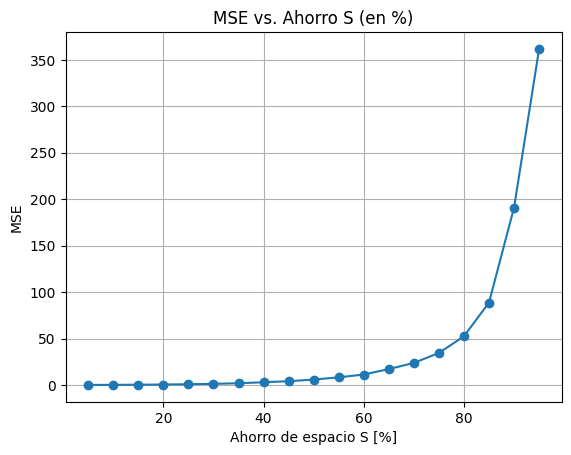

In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
import cv2

# ---------- utilidades ----------
def Escala_de_grises(img_path):
    return cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

def Separar_en_bloques(matriz_img, tam_bloque):
    bloques=[]
    alto,ancho=matriz_img.shape
    for i in range(0,alto,tam_bloque):
        for j in range(0,ancho, tam_bloque):
            bloque = matriz_img[i:i+tam_bloque, j:j+tam_bloque]
            if bloque.shape == (tam_bloque, tam_bloque):
                bloque=bloque.reshape(-1,1,order='F')
                bloques.append(bloque)
    return np.array(bloques)

def pca_transform(X_centrado,porcentaje_de_espacio):
    _,dim_vector,_ =X_centrado.shape
    k=(porcentaje_de_espacio/100)-1
    k*=-dim_vector
    k=round(k)
    X2D = X_centrado.squeeze(-1)  
    U, S, VT = np.linalg.svd(X2D, full_matrices=False)
    U_k= U[:,:k]
    S_k=np.diag(S[:k])
    VT_k = VT[:k, :]        
    return U_k,S_k,VT_k
    
def comprimir(img_path, tam_bloque, porcentaje = 80):
    Imagen_escalada=Escala_de_grises(img_path)
    X=Separar_en_bloques(Imagen_escalada,tam_bloque)
    Media_X = np.mean(X, axis=1, keepdims=True)  
    X_centrado = X - Media_X
    U_k,S_k,VT_k=pca_transform(X_centrado,porcentaje)
    Y_k = U_k @ S_k  
    
    return Y_k, Media_X, VT_k

def descomprimir(matriz_Y_k, Media_X, VT_k):
    Xreconstruida = (np.array(matriz_Y_k) @ np.array(VT_k))[:, :, None] + np.array(Media_X)
    n = Xreconstruida.shape[0]
    X_recon = np.zeros((n, 8, 8))
    for i in range(n):
        X_recon[i] = Xreconstruida[i].reshape(8, 8, order='F')
    
    return X_recon
    
def recomponer_imagen(bloques, alto, ancho, tam_bloque=8):

    alto_ajustado = (alto // tam_bloque) * tam_bloque
    ancho_ajustado = (ancho // tam_bloque) * tam_bloque
    
    imagen = np.zeros((alto_ajustado, ancho_ajustado))
    bloques_por_fila = ancho_ajustado // tam_bloque
    
    for idx, bloque in enumerate(bloques):
        if idx < len(bloques):
            fila = (idx // bloques_por_fila) * tam_bloque
            col = (idx % bloques_por_fila) * tam_bloque
            imagen[fila:fila+tam_bloque, col:col+tam_bloque] = bloque 
    return imagen

# Gráfico MSE vs Porcentaje de ahorro

def mse(a, b):
    min_h = min(a.shape[0], b.shape[0])
    min_w = min(a.shape[1], b.shape[1])
    
    a_crop = a[:min_h, :min_w]
    b_crop = b[:min_h, :min_w]
    
    return float(np.mean((a_crop - b_crop) ** 2))

def Graficar_MSE_vs_S(path, porcentajes):
    Imagen_escalada = Escala_de_grises(path)
    alto, ancho = Imagen_escalada.shape
    
    mses = []
    
    for porcentaje in porcentajes:
        Y_k, U_k, Media_X = comprimir(path, 8, porcentaje)
        X_reconstruida = descomprimir(Y_k, U_k, Media_X)
        img_final = recomponer_imagen(X_reconstruida, alto, ancho, 8)
        
        MSE_value = mse(Imagen_escalada, img_final)
        mses.append(MSE_value)
        print(f"Ahorro {porcentaje}%: MSE = {MSE_value:.1f}")
    
    # Grafico
    plt.plot(porcentajes, mses, marker='o')
    plt.xlabel('Ahorro de espacio S [%]')
    plt.ylabel('MSE')
    plt.title('MSE vs. Ahorro S (en %)')
    plt.grid(True)
    plt.show()

# ---------- Ejecución ----------
path = r"img_04.jpg"
porcentajes = list(range(5, 100, 5)) 

Graficar_MSE_vs_S(path, porcentajes)

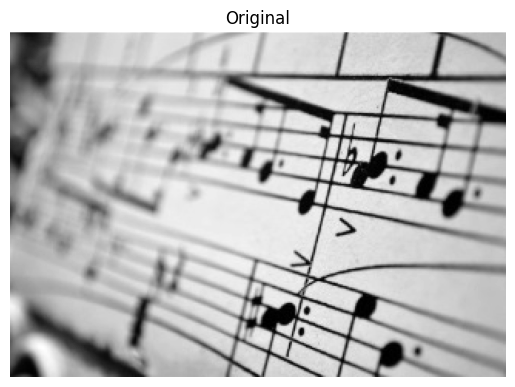

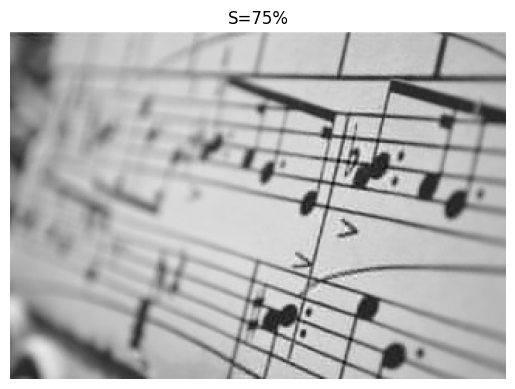

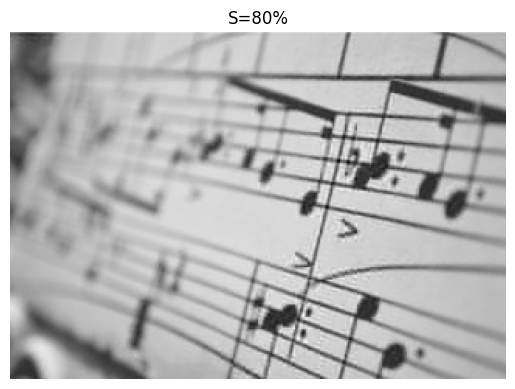

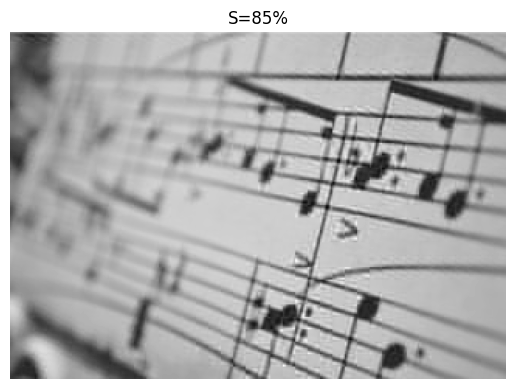

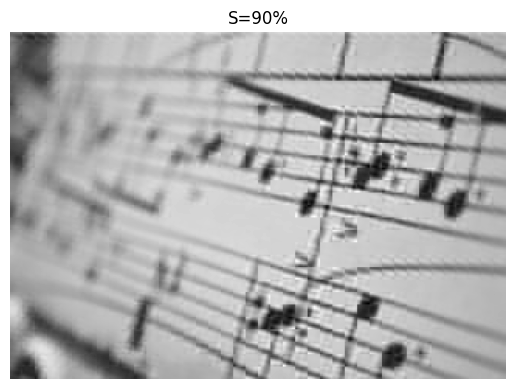

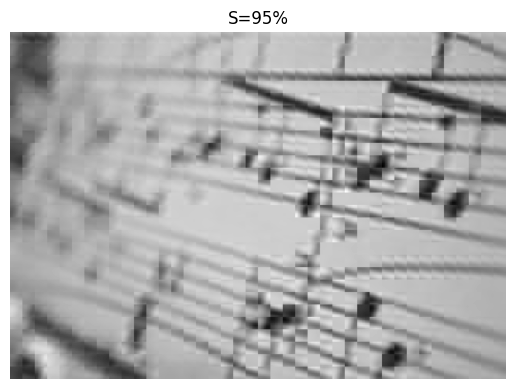

In [ ]:
def mostrar_imagenes(path, porcentajes_ahorro):
    """
    Muestra cada imagen por separado
    """
    # Cargar imagen original
    imagen_original = Escala_de_grises(path)
    alto, ancho = imagen_original.shape
    
    # Mostrar imagen original
    plt.figure()
    plt.imshow(imagen_original, cmap='gray')
    plt.title("Original")
    plt.axis('off')
    plt.show()
    
    # Mostrar cada imagen comprimida por separado
    for porcentaje in porcentajes_ahorro:
        # Comprimir y reconstruir
        Y_k, Media_X, VT_k = comprimir(path, 8, porcentaje)
        X_reconstruida = descomprimir(Y_k, Media_X, VT_k)
        img_reconstruida = recomponer_imagen(X_reconstruida, alto, ancho, 8)
        
        # Mostrar imagen
        plt.figure()
        plt.imshow(img_reconstruida, cmap='gray')
        plt.title(f"S={porcentaje}%")
        plt.axis('off')
        plt.show()

# -------- Ejecución ---------
path = r"img_04.jpg"
porcentajes_ahorro = [75, 80, 85, 90, 95]

mostrar_imagenes(path, porcentajes_ahorro)